# Exploratory Data Analysis (EDA)

This notebook is used to analyze and investigate the datasets with the aim of having a clear understanding about the data.


In [1]:
%matplotlib inline

In [2]:
# Import libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.core.config import TARGET
from src.core.logging import get_logger
from src.data.load import load_processed_data

from sklearn.linear_model import LinearRegression

In [3]:
# Initialize the logger
logger = get_logger()

# Set the max rows and columns to None - show everything
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Set the plot background to black
plt.style.use("dark_background")

In [4]:
# Load the processed data
df = load_processed_data(is_train=True)

logger.info("✅ Successfully loaded the train set")

# Show the first 5 rows
df.head()

16:35 | INFO | ✅ Successfully loaded the train set


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,HouseAge,QualSF
0,1,60,RL,65.0,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2566,3.5,5,17962
1,2,20,RL,80.0,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2524,2.5,31,15144
2,3,60,RL,68.0,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2706,3.5,7,18942
3,4,70,RL,60.0,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2473,2.0,91,17311
4,5,60,RL,84.0,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3343,3.5,8,26744


## Remove any unnecessary columns


In [5]:
# Drop the Id as this will not be used for our predictions
df.drop(columns=["Id"], inplace=True)  # inplace=True will modify the existing DataFrame

# Show the first 5 rows
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,HouseAge,QualSF
0,60,RL,65.0,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2566,3.5,5,17962
1,20,RL,80.0,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2524,2.5,31,15144
2,60,RL,68.0,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2706,3.5,7,18942
3,70,RL,60.0,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2473,2.0,91,17311
4,60,RL,84.0,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3343,3.5,8,26744


## Missing values


In [6]:
# Show the missing values per columns
missing_values = df.isna().sum().to_frame(name="Missing Values")

# Text to show
text = "📊 MISSING VALUES PER COLUMN"

print("=" * 60)
print(text.center(60))
print("=" * 60)

# Sort missing values by descending
missing_values.sort_values(by="Missing Values", ascending=False)

                📊 MISSING VALUES PER COLUMN                 


,Missing Values
MasVnrType,872
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
Electrical,1
Functional,0
GarageArea,0
GarageCars,0
GarageFinish,0
GarageType,0


## Visualizations


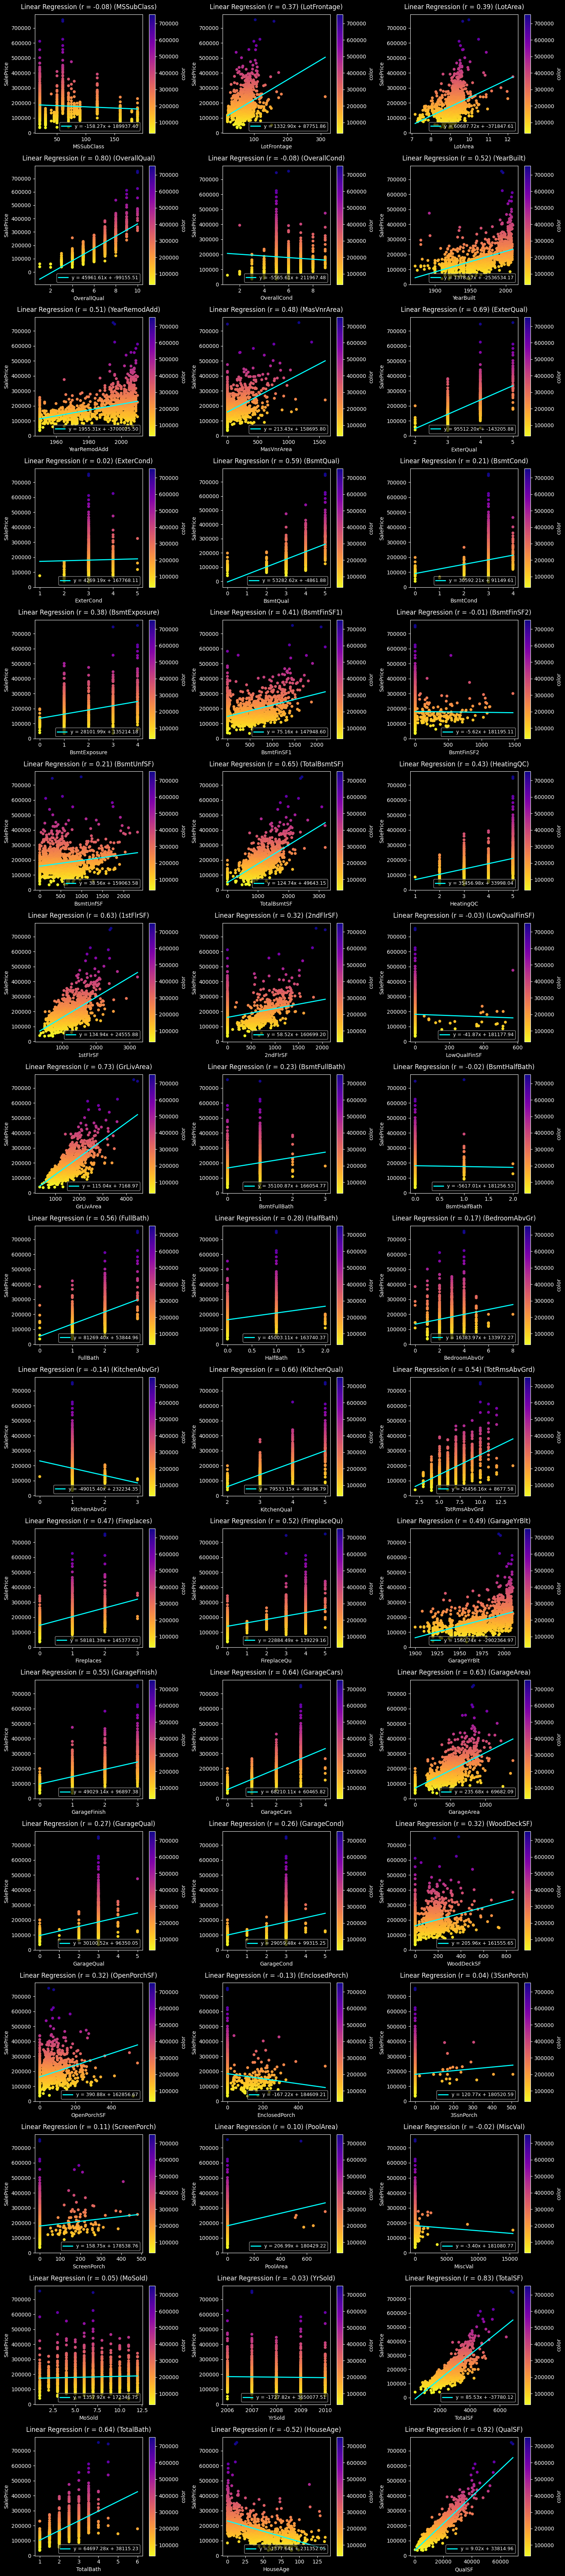

In [7]:
# Select numeric features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove the target from numeric_features so we don't plot it against itself
numeric_features = [col for col in numeric_features if col != TARGET]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_features) / n_cols)

# Set figure size
fig = plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop over numeric features
for i, col in enumerate(numeric_features, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.set_facecolor("black")

    # Remove rows with NaN values for this specific feature and target
    mask = df[[col, TARGET]].notna().all(axis=1)
    df_clean = df[mask]

    # Calculate correlation
    corr = df_clean[col].corr(df_clean[TARGET])

    # Fit linear regression for the trend line
    X = df_clean[[col]].values
    y = df_clean[TARGET].values
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Create scatter plot
    scatter = plt.scatter(
        x=df_clean[col],
        y=df_clean[TARGET],
        s=30,
        c=df_clean[TARGET],
        cmap="plasma_r",
        edgecolors="none",
    )

    # Plot regression line
    x_line = np.array([df_clean[col].min(), df_clean[col].max()])
    y_line = slope * x_line + intercept
    plt.plot(
        x_line,
        y_line,
        color="cyan",
        linewidth=2,
        label=f"y = {slope:.2f}x + {intercept:.2f}",
    )

    # Style the axes
    ax.spines["bottom"].set_color("white")
    ax.spines["left"].set_color("white")
    ax.spines["top"].set_color("white")
    ax.spines["right"].set_color("white")
    ax.tick_params(colors="white", which="both")
    ax.xaxis.label.set_color("white")
    ax.yaxis.label.set_color("white")
    ax.title.set_color("white")

    plt.xlabel(col, fontsize=10)
    plt.ylabel(TARGET, fontsize=10)
    plt.title(f"Linear Regression (r = {corr:.2f}) ({col})", fontsize=12, pad=10)

    # Add legend for equation
    plt.legend(loc="lower right", fontsize=9, framealpha=0.7)

    # Add colorbar legend
    cbar = plt.colorbar(scatter, ax=ax, label="color")
    cbar.ax.yaxis.set_tick_params(color="white")
    cbar.outline.set_edgecolor("white")
    cbar.set_label("color", color="white")
    plt.setp(plt.getp(cbar.ax.axes, "yticklabels"), color="white")

plt.tight_layout()
plt.show()

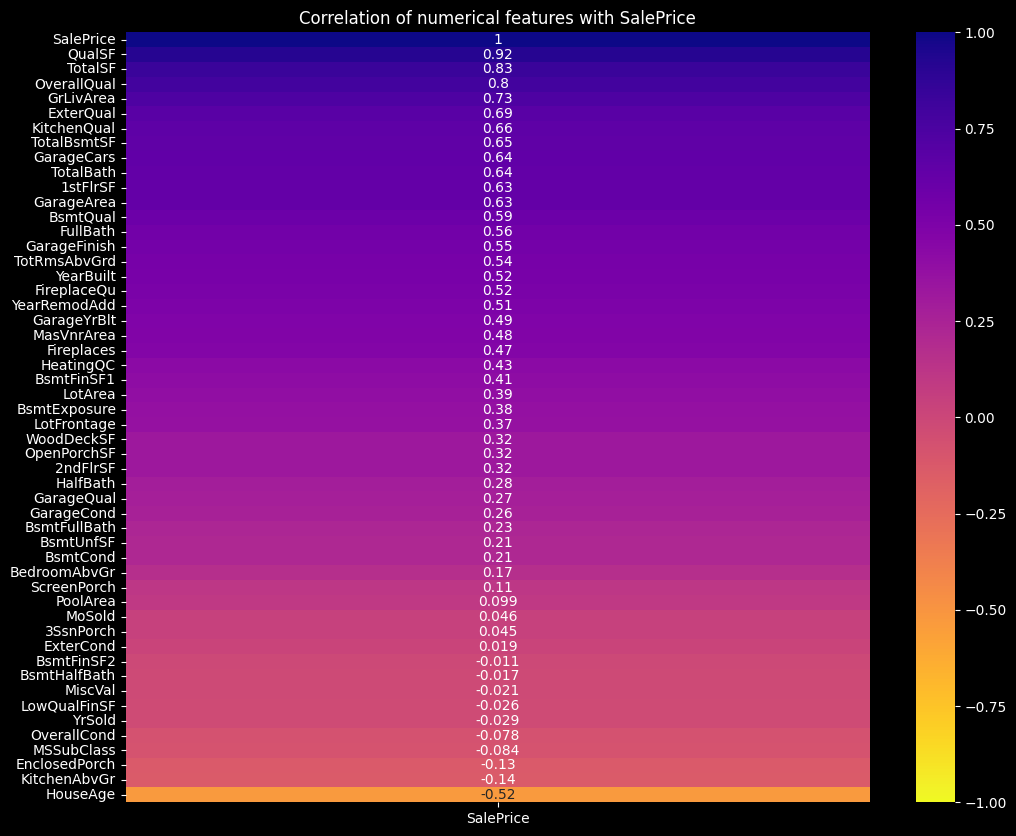

In [8]:
# Select numeric features
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlations
corr = numeric_df.corr()

# Set figure size
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    data=corr[[TARGET]].sort_values(by=TARGET, ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="plasma_r",
)
plt.title(f"Correlation of numerical features with {TARGET}")
plt.show()